# Завдання
## Лабораторну роботу можна виконувати в Kaggle, Colaboratory, IPython Notebook (або будь якому іншому програмному забезпеченні).
1. Проаналізувати в яких країнах наразі відбувається спалах захворювань, а в яких відбувається затухання захворювань.
2. Згідно уподобань з переліку обрати одну країну, в якій відбувається спалах, та одну країну, для якої відбувається затухання, та застосувати до неї модель SIR-F. (в даному випадку задача вибору країни є творчою, можна також орієнтуватися на їх географічне розташування, кількість населення тощо).
3. Для обраних країн визначити параметри моделі (theta, kappa, rho, sigma, tau, …), вивести їх на графіку з плином часу.
4. Спрогнозувати показники Infected, Fatal, Recovered  з використанням отриманих параметрів на 7, 30 та 300 днів.
5. Визначити найближчий пік захворюваності (дата).
6. Визначити коли в країні не залишиться хворих на Covid-2019.
7. Порівняти отримані результати для обраних країн.
8. Отримані результати оформити у вигляді звіту до лабораторної роботи.


In [1]:
import pandas as pd

import matplotlib.pyplot as plt

import numpy as np
from scipy.integrate import solve_ivp

In [2]:
data = pd.read_csv('./Data/1.csv')

C:\Users\dadmo\AppData\Local\Temp\ipykernel_20592\2299307402.py:1: DtypeWarning: Columns (43) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('./Data/1.csv')


## Підготовка

In [3]:
data['date'] = pd.to_datetime(data['date'])

In [4]:
data

,id,date,confirmed,deaths,recovered,tests,vaccines,people_vaccinated,people_fully_vaccinated,hosp,...,iso_alpha_3,iso_alpha_2,iso_numeric,iso_currency,key_local,key_google_mobility,key_apple_mobility,key_jhu_csse,key_nuts,key_gadm
0,8320791a,2020-03-13,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8320791a,2020-03-14,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8320791a,2020-03-15,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8320791a,2020-03-16,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8320791a,2020-03-17,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287778,97a59c79,2024-10-15,4801548.0,43656.0,4747034.0,57605544.0,13467304.0,6983304.0,6896341.0,417.0,...,CZE,CZ,203.0,CZK,NaN,ChIJQ4Ld14-UC0cRb1jb03UcZvg,Czech Republic,CZ,NaN,CZE
287779,97a59c79,2024-10-16,4802419.0,43657.0,4747166.0,57609851.0,13467378.0,6983373.0,6896346.0,372.0,...,CZE,CZ,203.0,CZK,NaN,ChIJQ4Ld14-UC0cRb1jb03UcZvg,Czech Republic,CZ,NaN,CZE
287780,97a59c79,2024-10-17,4803294.0,43664.0,4749166.0,57613882.0,13467440.0,6983433.0,6896348.0,357.0,...,CZE,CZ,203.0,CZK,NaN,ChIJQ4Ld14-UC0cRb1jb03UcZvg,Czech Republic,CZ,NaN,CZE
287781,97a59c79,2024-10-18,4804047.0,43667.0,4750482.0,57617409.0,13467488.0,6983479.0,6896350.0,337.0,...,CZE,CZ,203.0,CZK,NaN,ChIJQ4Ld14-UC0cRb1jb03UcZvg,Czech Republic,CZ,NaN,CZE


In [5]:
data.columns

Index(['id', 'date', 'confirmed', 'deaths', 'recovered', 'tests', 'vaccines',
       'people_vaccinated', 'people_fully_vaccinated', 'hosp', 'icu', 'vent',
       'school_closing', 'workplace_closing', 'cancel_events',
       'gatherings_restrictions', 'transport_closing',
       'stay_home_restrictions', 'internal_movement_restrictions',
       'international_movement_restrictions', 'information_campaigns',
       'testing_policy', 'contact_tracing', 'facial_coverings',
       'vaccination_policy', 'elderly_people_protection',
       'government_response_index', 'stringency_index',
       'containment_health_index', 'economic_support_index',
       'administrative_area_level', 'administrative_area_level_1',
       'administrative_area_level_2', 'administrative_area_level_3',
       'latitude', 'longitude', 'population', 'iso_alpha_3', 'iso_alpha_2',
       'iso_numeric', 'iso_currency', 'key_local', 'key_google_mobility',
       'key_apple_mobility', 'key_jhu_csse', 'key_nuts', 'key_g

In [6]:
data_filtered = data.loc[:, ('administrative_area_level_1', 'date', 'confirmed', 'deaths', 'recovered', 'population')]
data_filtered.rename(columns={'administrative_area_level_1': 'Country', 'date': "Date", 'confirmed': "Confirmed", "deaths": "Deaths", "recovered": "Recovered", "population": "Population"}, inplace=True)

In [7]:
data_filtered.isnull().any()

Country       False
Date          False
Confirmed      True
Deaths         True
Recovered      True
Population     True
dtype: bool

In [8]:
data_filtered.dropna(inplace=True)

In [9]:
data_filtered.isnull().any()

Country       False
Date          False
Confirmed     False
Deaths        False
Recovered     False
Population    False
dtype: bool

## 1. Проаналізувати в яких країнах наразі відбувається спалах захворювань, а в яких відбувається затухання захворювань.

In [10]:
data_filtered[data_filtered['Date'] > pd.to_datetime('2023-02')]['Country'].unique()

array(['Germany', 'Brazil', 'Austria', 'Croatia', 'Italy',
       'Czech Republic'], dtype=object)

In [11]:
# outbreak: "Brazil" "Austria"
county_name_outbreak = "Brazil"
county_name_attenuation = "Italy"
# attenuation: "Italy" "Germany" "Croatia" "Czech Republic"

## 2. Згідно уподобань з переліку обрати одну країну, в якій відбувається спалах, та одну країну, для якої відбувається затухання, та застосувати до неї модель SIR-F. (в даному випадку задача вибору країни є творчою, можна також орієнтуватися на їх географічне розташування, кількість населення тощо).


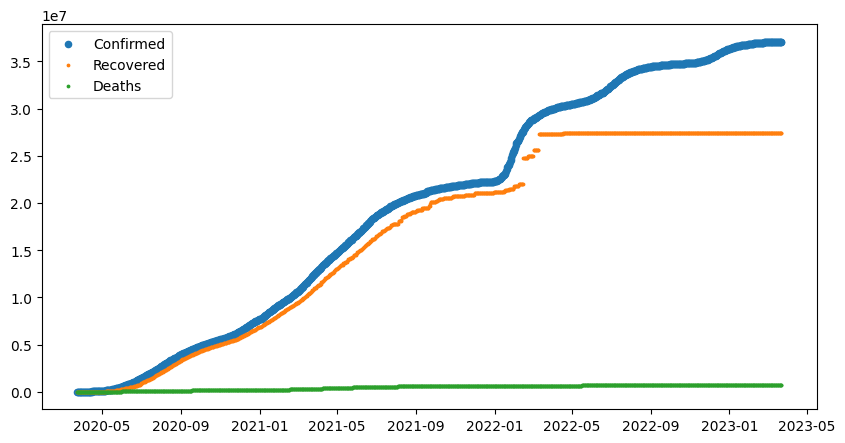

In [12]:
plt.figure(figsize=(10, 5))
data_outbreak = data_filtered[data_filtered['Country'] == county_name_outbreak].reset_index(drop=True)
plt.scatter(y=data_outbreak['Confirmed'], x=data_outbreak['Date'], s=20, label='Confirmed')
plt.scatter(y=data_outbreak['Recovered'], x=data_outbreak['Date'], s=3, label='Recovered')
plt.scatter(y=data_outbreak['Deaths'], x=data_outbreak['Date'], s=3, label='Deaths')
plt.legend()

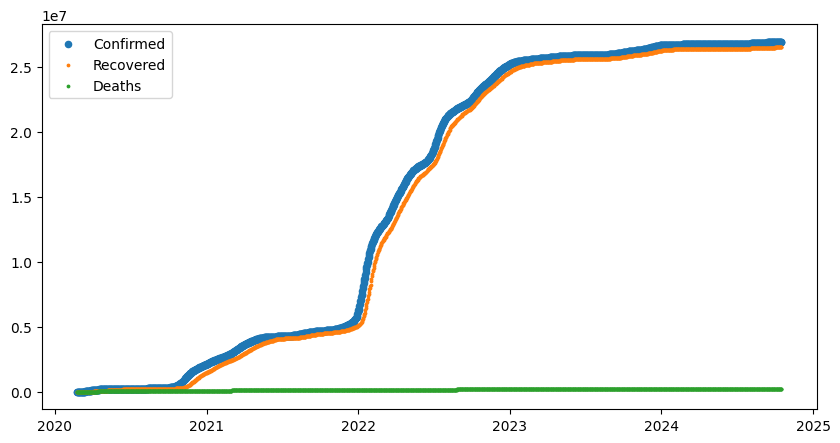

In [13]:
plt.figure(figsize=(10, 5))
data_attenuation = data_filtered[data_filtered['Country'] == county_name_attenuation].reset_index(drop=True)
plt.scatter(y=data_attenuation['Confirmed'], x=data_attenuation['Date'], s=20, label='Confirmed')
plt.scatter(y=data_attenuation['Recovered'], x=data_attenuation['Date'], s=3, label='Recovered')
plt.scatter(y=data_attenuation['Deaths'], x=data_attenuation['Date'], s=3, label='Deaths')
plt.legend()

## 3. Для обраних країн визначити параметри моделі (theta, kappa, rho, sigma, tau, …), вивести їх на графіку з плином часу.


### SIR-F:  
S : Susceptible (= Population - Confirmed)  
S∗ : Confirmed and un-categorized  
I : Confirmed and categorized as Infected  
R : Confirmed and categorized as Recovered  
F : Confirmed and categorzied as Fatal  

In [14]:
suspectible_outbreak = data_outbreak['Population'] - data_outbreak["Confirmed"]
confirmed_outbreak = data_outbreak["Confirmed"]
infected_outbreak = data_outbreak["Confirmed"] - data_outbreak["Recovered"] - data_outbreak["Deaths"]
recovered_outbreak = data_outbreak["Recovered"]
fatal_outbreak = data_outbreak["Deaths"]

In [ ]:
N = data_outbreak['Population']
x_outbreak = suspectible_outbreak / N
y_outbreak = infected_outbreak / N
z_outbreak = recovered_outbreak / N
w_outbreak = fatal_outbreak / N

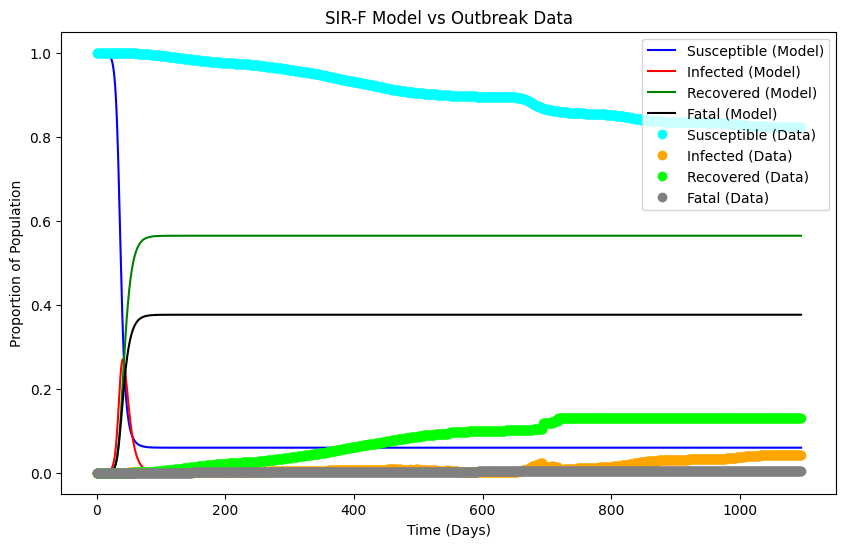

In [21]:
rho_guess = 0.5
sigma_guess = 0.1
kappa_guess = 0.05

initial_conditions = [x_outbreak[0], y_outbreak[0], z_outbreak[0], w_outbreak[0]]

def sirf_model(T, variables, rho, sigma, kappa):
    x, y, z, w = variables
    dx_dt = -rho * x * y
    dy_dt = rho * x * y *(1 - sigma) - (sigma + kappa) * y
    dz_dt = sigma * y
    dw_dt = rho * sigma * x * y + kappa * y
    return [dx_dt, dy_dt, dz_dt, dw_dt]

time_span = [0, len(x_outbreak)]
time_points = np.arange(0, len(x_outbreak), 1)

solution = solve_ivp(
    sirf_model, 
    time_span,
    initial_conditions, 
    args=(rho_guess, sigma_guess, kappa_guess), 
    t_eval=time_points
)

x_solution, y_solution, z_solution, w_solution = solution.y
plt.figure(figsize=(10, 6))
plt.plot(time_points, x_solution, label='Susceptible (Model)', color='blue')
plt.plot(time_points, y_solution, label='Infected (Model)', color='red')
plt.plot(time_points, z_solution, label='Recovered (Model)', color='green')
plt.plot(time_points, w_solution, label='Fatal (Model)', color='black')

# Also plot the actual data
plt.plot(time_points, x_outbreak, 'o', label='Susceptible (Data)', color='cyan')
plt.plot(time_points, y_outbreak, 'o', label='Infected (Data)', color='orange')
plt.plot(time_points, z_outbreak, 'o', label='Recovered (Data)', color='lime')
plt.plot(time_points, w_outbreak, 'o', label='Fatal (Data)', color='gray')

plt.xlabel("Time (Days)")
plt.ylabel("Proportion of Population")
plt.legend()
plt.title("SIR-F Model vs Outbreak Data")
plt.show()

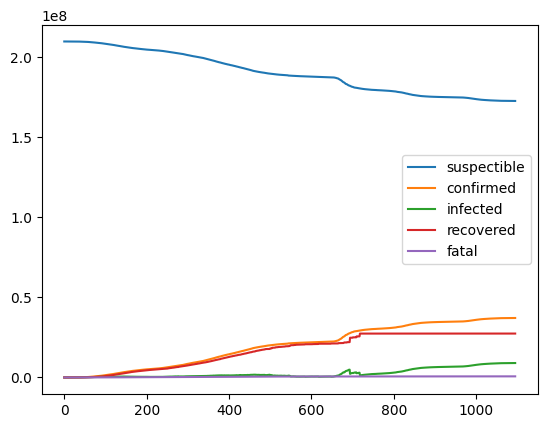

In [16]:
plt.plot(suspectible_outbreak, label="suspectible")
plt.plot(confirmed_outbreak, label="confirmed")
plt.plot(infected_outbreak, label="infected")
plt.plot(recovered_outbreak, label="recovered")
plt.plot(fatal_outbreak, label="fatal")
plt.legend()

In [17]:
suspectible_attenuation = data_attenuation['Population'] - data_attenuation["Confirmed"]
confirmed_attenuation = data_attenuation["Confirmed"]
infected_attenuation = data_attenuation["Confirmed"] - data_attenuation["Recovered"] - data_attenuation["Deaths"]
recovered_attenuation = data_attenuation["Recovered"]
fatal_attenuation = data_attenuation["Deaths"]

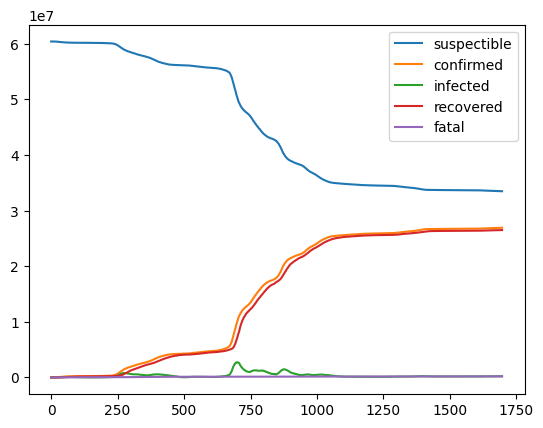

In [18]:
plt.plot(suspectible_attenuation, label="suspectible")
plt.plot(confirmed_attenuation, label="confirmed")
plt.plot(infected_attenuation, label="infected")
plt.plot(recovered_attenuation, label="recovered")
plt.plot(fatal_attenuation, label="fatal")
plt.legend()

## 4. Спрогнозувати показники Infected, Fatal, Recovered  з використанням отриманих параметрів на 7, 30 та 300 днів.


## 5. Визначити найближчий пік захворюваності (дата).

## 6. Визначити коли в країні не залишиться хворих на Covid-2019.


## 7. Порівняти отримані результати для обраних країн.

## 8. Отримані результати оформити у вигляді звіту до лабораторної роботи.